# Medical Insurance Linear Regression

### Importing Libraries

In [2]:
# For this project we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Loading raw data

In [3]:
#loading the csv file
med_data=pd.read_csv("C:/Users/mayur/Downloads/insurance.csv")

#looking at the row and column structure
med_data.head()         

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#the charges are our dependent variable and everything else are our independent variables
x=med_data.columns.values
x

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
      dtype=object)

### Preprocessing of Data

In [5]:
#rearranging and adding the charges column at the start of the dataframe since its our dependent variable
x=['charges','age', 'sex', 'bmi', 'children', 'smoker', 'region']
med_data=med_data[x]
med_data

,charges,age,sex,bmi,children,smoker,region
0,16884.92400,19,female,27.900,0,yes,southwest
1,1725.55230,18,male,33.770,1,no,southeast
2,4449.46200,28,male,33.000,3,no,southeast
3,21984.47061,33,male,22.705,0,no,northwest
4,3866.85520,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...,...
1333,10600.54830,50,male,30.970,3,no,northwest
1334,2205.98080,18,female,31.920,0,no,northeast
1335,1629.83350,18,female,36.850,0,no,southeast
1336,2007.94500,21,female,25.800,0,no,southwest


In [6]:
med_data.describe(include='all')
#after looking at our data:
#1) there don't seem to be any gaps in data(count shows that) 

,charges,age,sex,bmi,children,smoker,region
count,1338.000000,1338.000000,1338,1338.000000,1338.000000,1338,1338
unique,NaN,NaN,2,NaN,NaN,2,4
top,NaN,NaN,male,NaN,NaN,no,southeast
freq,NaN,NaN,676,NaN,NaN,1064,364
mean,13270.422265,39.207025,NaN,30.663397,1.094918,NaN,NaN
std,12110.011237,14.049960,NaN,6.098187,1.205493,NaN,NaN
min,1121.873900,18.000000,NaN,15.960000,0.000000,NaN,NaN
25%,4740.287150,27.000000,NaN,26.296250,0.000000,NaN,NaN
50%,9382.033000,39.000000,NaN,30.400000,1.000000,NaN,NaN
75%,16639.912515,51.000000,NaN,34.693750,2.000000,NaN,NaN


In [7]:
#this data has no null values
med_data.isnull().sum()

charges     0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

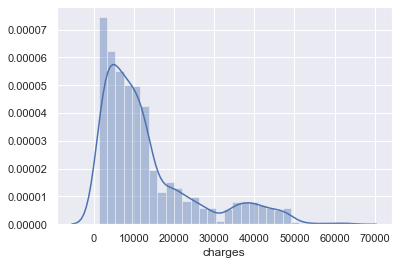

In [8]:
#the data exploration phase helps us decide if we want to make any changes to the data
# we will see the Probability Distribution function (PDF) to determine if there are any outliers in the data

sns.distplot(med_data['charges'])

,charges,age,sex,bmi,children,smoker,region
count,1204.000000,1204.000000,1204,1204.000000,1204.000000,1204,1204
unique,NaN,NaN,2,NaN,NaN,2,4
top,NaN,NaN,female,NaN,NaN,no,southeast
freq,NaN,NaN,612,NaN,NaN,1061,309
mean,10030.798217,38.920266,NaN,30.108131,1.080565,NaN,NaN
std,7400.326935,14.083067,NaN,6.002234,1.213387,NaN,NaN
min,1121.873900,18.000000,NaN,15.960000,0.000000,NaN,NaN
25%,4425.455588,26.000000,NaN,25.800000,0.000000,NaN,NaN
50%,8435.368150,39.000000,NaN,29.800000,1.000000,NaN,NaN
75%,12990.208188,51.000000,NaN,33.835000,2.000000,NaN,NaN


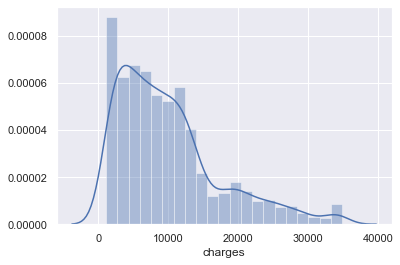

In [9]:
#looking at the above PDF of charges in the dataset we can see that there are some oultiers that if removed will give us a good even dataset 
#We will be removing the 10% outliers in the data that are dragging our average away from the normal distribution
#using the quantile method to remove the 10% outliers
d=med_data['charges'].quantile(0.90)
med_data1=med_data[med_data['charges']<d]
sns.distplot(med_data1['charges'])
#looking at our data to see if the changes made a difference
med_data1.describe(include='all')

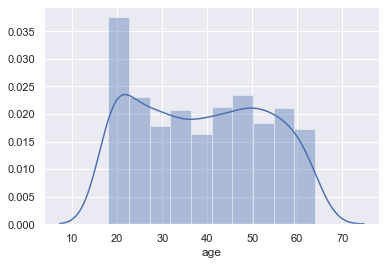

In [10]:
#PDF of the age in the dataset. THe data seems to be balanced
sns.distplot(med_data1['age'])

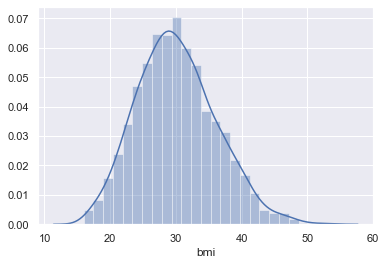

In [11]:
#PDF of the bmi values which is also normally distributed
sns.distplot(med_data1['bmi'])

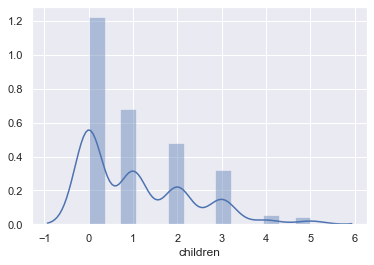

In [12]:
#The children data below is displayed in a distribution plot
sns.distplot(med_data1['children'])

In [13]:
#after making the intial changes in the dataset, the index values of each row needs to be reset. 
#This reset will remove the old index and insert the new index as per the order of the row.
data_indexed = med_data1.reset_index(drop=True)
data_indexed

,charges,age,sex,bmi,children,smoker,region
0,16884.92400,19,female,27.900,0,yes,southwest
1,1725.55230,18,male,33.770,1,no,southeast
2,4449.46200,28,male,33.000,3,no,southeast
3,21984.47061,33,male,22.705,0,no,northwest
4,3866.85520,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...,...
1199,10600.54830,50,male,30.970,3,no,northwest
1200,2205.98080,18,female,31.920,0,no,northeast
1201,1629.83350,18,female,36.850,0,no,southeast
1202,2007.94500,21,female,25.800,0,no,southwest


### OLS Assumption Check

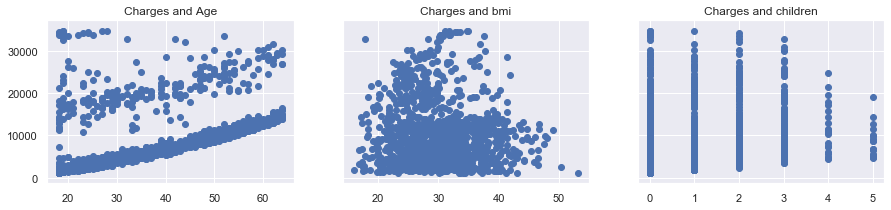

In [14]:
#using matplotlib to check relationship between our dependent variable charges and age,bmi and children
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey='all',figsize =(15,3))
ax1.scatter(data_indexed['age'],data_indexed['charges'])
ax1.set_title('Charges and Age')
ax2.scatter(data_indexed['bmi'],data_indexed['charges'])
ax2.set_title('Charges and bmi')
ax3.scatter(data_indexed['children'],data_indexed['charges'])
ax3.set_title('Charges and children')

plt.show()

In [15]:
#When looking at the a scatter plots there seems to be a lack of linear relationship for bmi and children graphs
#Ideally a log transformation of the dependent variable will do the trick
#We will test that method and create another plot with log_charge values
log_charge=np.log(data_indexed['charges'])
data_indexed['log_charges']=log_charge
data_indexed

,charges,age,sex,bmi,children,smoker,region,log_charges
0,16884.92400,19,female,27.900,0,yes,southwest,9.734176
1,1725.55230,18,male,33.770,1,no,southeast,7.453302
2,4449.46200,28,male,33.000,3,no,southeast,8.400538
3,21984.47061,33,male,22.705,0,no,northwest,9.998092
4,3866.85520,32,male,28.880,0,no,northwest,8.260197
...,...,...,...,...,...,...,...,...
1199,10600.54830,50,male,30.970,3,no,northwest,9.268661
1200,2205.98080,18,female,31.920,0,no,northeast,7.698927
1201,1629.83350,18,female,36.850,0,no,southeast,7.396233
1202,2007.94500,21,female,25.800,0,no,southwest,7.604867


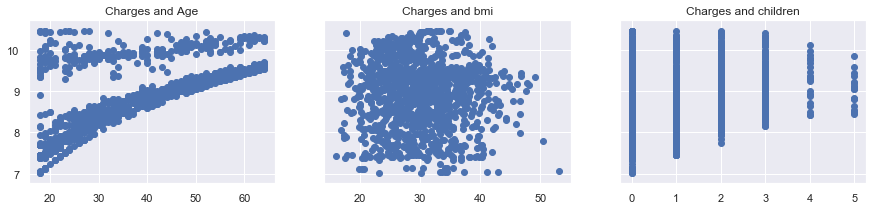

In [16]:
#after transforming the charges variable to a log variable. We will check the variable relationships again

f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey='all',figsize =(15,3))
ax1.scatter(data_indexed['age'],data_indexed['log_charges'])
ax1.set_title('Charges and Age')
ax2.scatter(data_indexed['bmi'],data_indexed['log_charges'])
ax2.set_title('Charges and bmi')
ax3.scatter(data_indexed['children'],data_indexed['log_charges'])
ax3.set_title('Charges and children')

plt.show()

In [17]:
sqrt_bmi=np.sqrt(data_indexed['bmi'])
sqrt_bmi

0       5.282045
1       5.811196
2       5.744563
3       4.764976
4       5.374012
          ...   
1199    5.565070
1200    5.649779
1201    6.070420
1202    5.079370
1203    5.391660
Name: bmi, Length: 1204, dtype: float64

In [18]:
data_indexed['sqt_bmi']=sqrt_bmi
data_indexed

,charges,age,sex,bmi,children,smoker,region,log_charges,sqt_bmi
0,16884.92400,19,female,27.900,0,yes,southwest,9.734176,5.282045
1,1725.55230,18,male,33.770,1,no,southeast,7.453302,5.811196
2,4449.46200,28,male,33.000,3,no,southeast,8.400538,5.744563
3,21984.47061,33,male,22.705,0,no,northwest,9.998092,4.764976
4,3866.85520,32,male,28.880,0,no,northwest,8.260197,5.374012
...,...,...,...,...,...,...,...,...,...
1199,10600.54830,50,male,30.970,3,no,northwest,9.268661,5.565070
1200,2205.98080,18,female,31.920,0,no,northeast,7.698927,5.649779
1201,1629.83350,18,female,36.850,0,no,southeast,7.396233,6.070420
1202,2007.94500,21,female,25.800,0,no,southwest,7.604867,5.079370


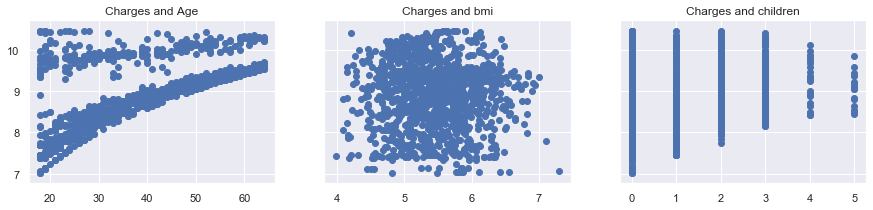

In [19]:
#after transforming the bmi variable to a sqrt variable. We will check the variable relationships again

f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey='all',figsize =(15,3))
ax1.scatter(data_indexed['age'],data_indexed['log_charges'])
ax1.set_title('Charges and Age')
ax2.scatter(data_indexed['sqt_bmi'],data_indexed['log_charges'])
ax2.set_title('Charges and bmi')
ax3.scatter(data_indexed['children'],data_indexed['log_charges'])
ax3.set_title('Charges and children')

plt.show()

### MultiCollinearity

In [20]:
#We will check the multicollinearity between the variables using the VIF method
data_indexed.columns.values

array(['charges', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'log_charges', 'sqt_bmi'], dtype=object)

In [33]:
#We will use stats.models library to check multicollinearity using VIF method. 
#We expect to move forward with the regression if the VIF of the continuous variables is less than 5 and greater than zero
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_indexed[['children','age','bmi']]
vif=pd.DataFrame()
vif["Features"]=variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif
#We have only two variables that are below 5 and will use them for our regression.  

,Features,VIF
0,children,1.761723
1,age,7.484783
2,bmi,7.750776


In [36]:
#the variable with the highest VIF will be removed. sqt_bmi will be removed
data_no_multicol=data_indexed.drop(['sqt_bmi','charges'],axis=1)
data_no_multicol

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197
...,...,...,...,...,...,...,...
1199,50,male,30.970,3,no,northwest,9.268661
1200,18,female,31.920,0,no,northeast,7.698927
1201,18,female,36.850,0,no,southeast,7.396233
1202,21,female,25.800,0,no,southwest,7.604867


### Creating Dummy Variables

In [40]:
#Dummy variables are created to include categorical variavles for linear regression
#pandas has a function to create dummies for multiple categorical variables
data_dummies=pd.get_dummies(data_no_multicol,drop_first=True)

data_dummies.columns.values

array(['age', 'bmi', 'children', 'log_charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype=object)

In [46]:
#rearranging columns a bit to keep the dependent variable as the first column 
data_dummies.columns=(['log_charges','age', 'bmi', 'children', 'sex_male', 'smoker_yes','region_northwest', 'region_southeast', 'region_southwest'])
data_dummies.head()

,log_charges,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,0,1,0,0,1
1,18,33.770,1,7.453302,1,0,0,1,0
2,28,33.000,3,8.400538,1,0,0,1,0
3,33,22.705,0,9.998092,1,0,1,0,0
4,32,28.880,0,8.260197,1,0,1,0,0


In [47]:
#checking multicollinearity
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#variables=data_dummies[['age', 'bmi', 'children','sex_male','smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
#vif=pd.DataFrame()
#vif["Features"]=variables.columns
#vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
#vif

,Features,VIF
0,age,28.648818
1,bmi,1.850414
2,children,31.514552
3,sex_male,1.951006
4,smoker_yes,1.436645
5,region_northwest,1.994053
6,region_southeast,2.158274
7,region_southwest,1.973571


### Linear Regression Model

In [51]:
#entering the inputs and dependent variables in seperate dataframes
inputs=data_dummies.drop(['log_charges'],axis=1)
targets=data_dummies['log_charges']

In [52]:
#now we will scale the data before regression using the scaler module
from sklearn.preprocessing import StandardScaler

# Creating the scaler object
scaler = StandardScaler()
# Fitting the inputs
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [124]:
inputs_scaled=scaler.transform(inputs)
#Now we will use train test split from sklearn to split our data for regression
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# I will use random state=42
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.25, random_state=42)
y_train.to_numpy()
y_test.to_numpy()

array([21, 41, 30, 30, 51, 27, 19, 28, 64, 24, 48, 29, 40, 61, 57, 19, 39,
       45, 38, 45, 26, 27, 32, 54, 43, 19, 49, 20, 43, 19, 40, 59, 34, 45,
       27, 50, 36, 33, 33, 36, 41, 59, 64, 27, 59, 32, 56, 29, 52, 58, 47,
       19, 51, 39, 32, 63, 45, 58, 53, 48, 28, 42, 61, 64, 33, 52, 49, 32,
       39, 48, 23, 18, 18, 52, 64, 25, 38, 48, 47, 30, 36, 58, 46, 19, 60,
       18, 23, 40, 30, 33, 56, 57, 20, 25, 54, 55, 32, 27, 29, 21, 37, 20,
       40, 34, 52, 41, 21, 61, 47, 57, 44, 41, 47, 28, 36, 19, 47, 25, 62,
       24, 54, 19, 23, 52, 29, 40, 36, 48, 38, 56, 35, 25, 50, 38, 33, 19,
       21, 47, 50, 40, 53, 54, 34, 22, 21, 63, 33, 42, 28, 39, 53, 50, 31,
       38, 19, 23, 36, 32, 31, 35, 48, 61, 28, 40, 26, 56, 44, 35, 35, 54,
       24, 49, 62, 55, 58, 55, 41, 57, 25, 21, 43, 63, 19, 34, 62, 37, 52,
       39, 19, 26, 59, 31, 39, 47, 44, 31, 53, 50, 61, 49, 58, 49, 25, 34,
       30, 59, 47, 37, 41, 31, 34, 39, 25, 63, 52, 40, 27, 19, 44, 21, 18,
       28, 23, 19, 43, 41

In [125]:
#creating the linear regression object
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
#checking the outputs of the regression model
y_pred=reg.predict(x_train)

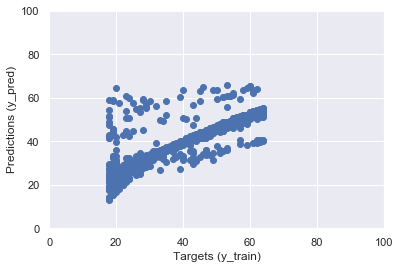

In [107]:
#comparing the predicted values to the actual values using graph. If the values are close to the 45 degree line they match closely.
plt.scatter(y_train, y_pred)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

Text(0.5, 1.0, 'Differences between train and pred')

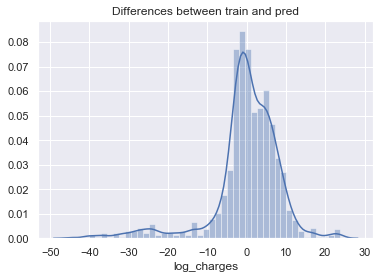

In [108]:
#second way to check the model is to check the differences between train and pred values.
#if they are normally distributed then the model is good.
#for the minor skews on the negative side of this graph we can imporove ur model to increase accuracy.
sns.distplot(y_train-y_pred)
plt.title("Differences between train and pred")

In [109]:
#checking our r squared value for this model
reg.score(x_train,y_train)

0.6258195564057372

In [110]:
# Obtain the bias (intercept) of the regression
reg.intercept_

39.067850114777364

In [111]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([ 0.07211741, -1.90903228, 13.20471653,  0.31869033, -8.04483112,
        0.55440925,  0.98303265,  1.26266336])

In [112]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,age,0.072117
1,bmi,-1.909032
2,children,13.204717
3,sex_male,0.318690
4,smoker_yes,-8.044831
5,region_northwest,0.554409
6,region_southeast,0.983033
7,region_southwest,1.262663


### Testing

In [166]:
#Now we will see the predictions using test data against. 
y_pred_test = reg.predict(x_test)
y_pred_test

array([22.51340853, 39.18414103, 32.33455865, 32.68189629, 46.80915951,
       33.4797496 , 33.36101078, 57.8182162 , 51.24460826, 23.31533232,
       42.05661277, 32.73929584, 39.45371093, 51.66066449, 49.42876381,
       24.15094339, 40.0327904 , 41.07254821, 37.86530971, 42.75962557,
       25.34772672, 29.62512986, 32.97955809, 47.69939986, 39.88266118,
       15.99406553, 45.39802319, 21.80395134, 42.11014641, 24.57013729,
       40.69849881, 49.52876611, 60.48435031, 43.02574228, 43.50795628,
       61.98429685, 36.30421386, 50.72980849, 31.79041583, 37.09943293,
       37.90274867, 50.52436594, 53.23769089, 29.3743062 , 35.7439631 ,
       33.44789311, 48.88154642, 32.94025148, 32.48295238, 52.19445946,
       44.49085058, 20.69102753, 48.02759825, 38.72127719, 34.98993995,
       52.4654095 , 43.09125056, 52.23043133, 45.85556486, 37.730992  ,
       29.08547191, 39.66990697, 52.6264934 , 40.75932306, 34.56930626,
       35.54705454, 45.98891322, 34.72507875, 38.26004512, 60.97

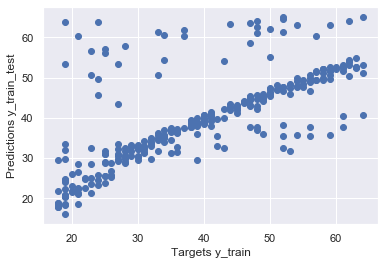

In [134]:
#comparing the predicted values to the actual values using graph. If the values are close to the 45 degree line they match closely.
plt.scatter(y_test, y_pred_test)
plt.xlabel('Targets y_test')
plt.ylabel('Predictions y_train_test')
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
plt.show()

In [178]:
#now we can conver the log values to our original values and see what results we received for price
pred_prices=pd.DataFrame(np.exp(y_pred_test.astype(float)),columns=['Predictions'])
pred_prices['Target']=np.exp(y_test).astype(float)
pred_prices

#there are a lot of NAs in the Target column. But we had aready checked for those values. 

,Predictions,Target
0,5.990307e+09,1.318816e+09
1,1.041013e+17,6.398435e+17
2,1.103368e+14,1.068647e+13
3,1.561591e+14,1.068647e+13
4,2.132847e+20,1.409349e+22
...,...,...
296,1.646669e+22,1.545539e+25
297,2.348211e+22,4.201210e+25
298,4.840276e+18,7.016736e+20
299,1.066522e+22,9.744803e+09


In [179]:
#we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    21
1    41
2    30
3    30
4    51
Name: log_charges, dtype: int64

In [180]:
#adding the correct target values to the df again
pred_prices['Target']=np.exp(y_test)

In [181]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
pred_prices['Residual'] = pred_prices['Target'] - pred_prices['Predictions']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [182]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
pred_prices['Difference%'] = np.absolute(pred_prices['Residual']/pred_prices['Target']*100)
pred_prices

,Predictions,Target,Residual,Difference%
0,5.990307e+09,1.318816e+09,-4.671491e+09,3.542187e+02
1,1.041013e+17,6.398435e+17,5.357422e+17,8.373019e+01
2,1.103368e+14,1.068647e+13,-9.965033e+13,9.324902e+02
3,1.561591e+14,1.068647e+13,-1.454726e+14,1.361278e+03
4,2.132847e+20,1.409349e+22,1.388021e+22,9.848664e+01
...,...,...,...,...
296,1.646669e+22,1.545539e+25,1.543892e+25,9.989346e+01
297,2.348211e+22,4.201210e+25,4.198862e+25,9.994411e+01
298,4.840276e+18,7.016736e+20,6.968333e+20,9.931018e+01
299,1.066522e+22,9.744803e+09,-1.066522e+22,1.094452e+14


In [187]:
#pred_prices2 = pred_prices.apply(pd.to_numeric, errors='coerce')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_rows = 2000
pred_prices.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
133,31696309180457340.00,31855931757113756.00,159622576656416.00,0.50
85,64663697.01,65659969.14,996272.12,1.52
215,228603629395830016.00,235385266837020000.00,6781637441189984.00,2.88
277,1368096678.38,1318815734.48,-49280943.90,3.74
210,623373650656817.88,583461742527454.88,-39911908129363.00,6.84
211,80409131365704224.00,86593400423993744.00,6184269058289520.00,7.14
265,28865049704232888.00,31855931757113756.00,2990882052880868.00,9.39
18,27841655995685708.00,31855931757113756.00,4014275761428048.00,12.60
241,56342118.54,65659969.14,9317850.59,14.19
72,56205954.48,65659969.14,9454014.66,14.40
